# TBIL- Analysis

In [239]:
from Extractor import DataExtractor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Data Extraction:

In [240]:
device_1=DataExtractor('./TBIL_device_data/VB7GRD15_TBIL.txt')
device_2=DataExtractor('./TBIL_device_data/VB7GRD18_TBIL.txt')
device_3=DataExtractor('./TBIL_device_data/VB7GRD41_TBIL.txt')

In [241]:
def obtain_patient_info(device_list,pat_no):
    import pandas as pd
    super_list=[]
    for device in device_list:
        data=[device.device_name,
              device.patient_id[pat_no],
              device.patient_concentration[pat_no]]+list(
              device.base_data[pat_no]['base_data'][:,0])+list(
              device.test_data[pat_no]['test_data'][:,0])
        super_list.append(data)
    df=pd.DataFrame(super_list)
    df.columns=['Device ID',
                'Sample ID',
                'Standard Device Concentrations']+[
                f'Base Data {i+1}' for i in range(15)]+[
                f'Test Data {i+1}' for i in range(15)]
    df=df.T
    df.columns=df.iloc[0]
    df=df.drop('Device ID',axis=0)
    return df

In [242]:
# print obtained datasets
for i in range(17):
    print(obtain_patient_info([device_1,device_2,device_3],pat_no=i),'\n')

Device ID                      VB7GRD15 VB7GRD18 VB7GRD41
Sample ID                          S193     S193     S193
Standard Device Concentrations     0.28     0.28     0.28
Base Data 1                     10868.0  10939.0  10949.0
Base Data 2                     10877.0  10955.0  10951.0
Base Data 3                     10873.0  10955.0  10957.0
Base Data 4                     10863.0  10961.0  10956.0
Base Data 5                     10863.0  10961.0  10953.0
Base Data 6                     10872.0  10964.0  10961.0
Base Data 7                     10879.0  10991.0  10959.0
Base Data 8                     10887.0  11003.0  10957.0
Base Data 9                     10885.0  11002.0  10963.0
Base Data 10                    10885.0  10991.0  10963.0
Base Data 11                    10885.0  10984.0  10965.0
Base Data 12                    10894.0  10991.0  10963.0
Base Data 13                    10887.0  10983.0  10963.0
Base Data 14                    10888.0  10981.0  10959.0
Base Data 15  

### Calculation of different parameters :

In [243]:
def obtain_parameters(pat_no):

    df=obtain_patient_info([device_1,device_2,device_3],pat_no).T
    
    df['Base Avg']=np.array(df[[f'Base Data {i+1}' for i in range(15)]].T.mean(),dtype=int)
    df['Test Avg']=np.array(df[[f'Test Data {i+1}' for i in range(15)]].T.mean(),dtype=int)
    df['Absorbance']=np.round(np.log10(np.array(df['Base Avg']/df['Test Avg'],dtype=float)),4)

    return df.T

In [244]:
# print obtained datasets
for i in range(17):
    print(obtain_parameters(pat_no=i),'\n')

Device ID                      VB7GRD15 VB7GRD18 VB7GRD41
Sample ID                          S193     S193     S193
Standard Device Concentrations     0.28     0.28     0.28
Base Data 1                     10868.0  10939.0  10949.0
Base Data 2                     10877.0  10955.0  10951.0
Base Data 3                     10873.0  10955.0  10957.0
Base Data 4                     10863.0  10961.0  10956.0
Base Data 5                     10863.0  10961.0  10953.0
Base Data 6                     10872.0  10964.0  10961.0
Base Data 7                     10879.0  10991.0  10959.0
Base Data 8                     10887.0  11003.0  10957.0
Base Data 9                     10885.0  11002.0  10963.0
Base Data 10                    10885.0  10991.0  10963.0
Base Data 11                    10885.0  10984.0  10965.0
Base Data 12                    10894.0  10991.0  10963.0
Base Data 13                    10887.0  10983.0  10963.0
Base Data 14                    10888.0  10981.0  10959.0
Base Data 15  

### Plotting, Regression, Outlier removal:

In [245]:
def obtain_abs_conc_data(device,total_patients=16):
    abs_conc=[]
    for i in range(total_patients):
        ddf=obtain_parameters(i)
        x,y=ddf[device]['Standard Device Concentrations'],ddf[device]['Absorbance']
        abs_conc.append((x,y))
    return np.array(abs_conc)[:,0],np.array(abs_conc,dtype=float)[:,1]

In [246]:
device_names=["VB7GRD15","VB7GRD18","VB7GRD41"]

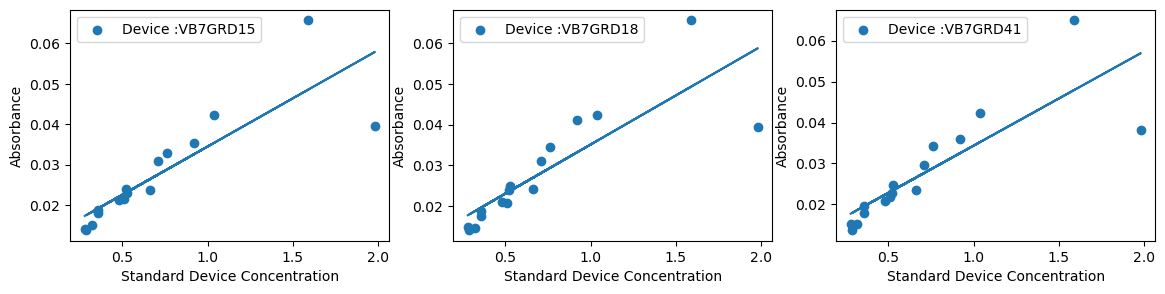

In [248]:
plt.figure(figsize=(14,3))
for i,device in enumerate(device_names):
    
    # Plottinig Datapoints
    plt.subplot(1,3,i+1)
    x,y=obtain_abs_conc_data(device)
    x=np.array([float(i) for i in x])
    y=np.array([float(i) for i in y])
    plt.scatter(x,y,label=f"Device :{device}")
    
    # Running Regression
    m,c=np.polyfit(x,y,1)
    
    # Plotting Regression Line
    plt.plot(x,[m*i+c for i in x])
    plt.legend()
    plt.xlabel("Standard Device Concentration")
    plt.ylabel("Absorbance")


From the above plot we can see an outlier which deviates from the general trend of the datapoints.Here I have used Visual Inspection Method as discussed before. We can remove it manually by masking the datapoint.

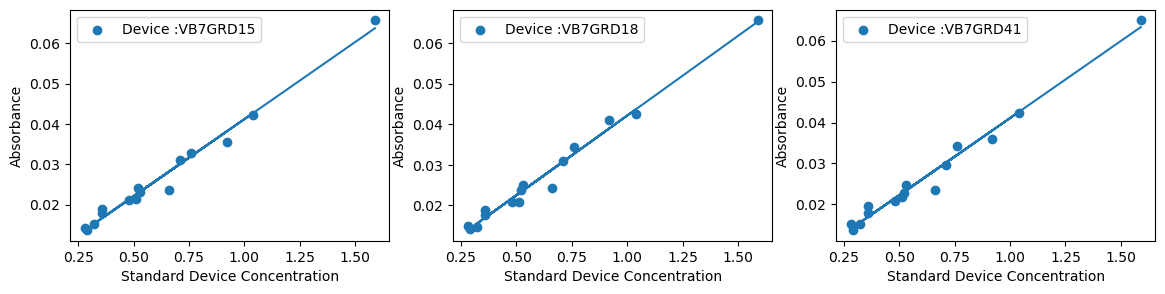

In [249]:
plt.figure(figsize=(14,3))
slopes=[]
for i,device in enumerate(device_names):
    
    #Plotting Datapoints
    plt.subplot(1,3,i+1)
    x,y=obtain_abs_conc_data(device)
    x=np.array([float(i) for i in x])
    y=np.array([float(i) for i in y])
    # Removing outliers
    x1=x[x<1.8]
    y1=y[x<1.8]
    
    # Running regression after outlier removal
    plt.scatter(x1,y1,label=f"Device :{device}")
    m1,c1=np.polyfit(x1,y1,1)
    plt.plot(x1,(m1*x1+c1))
    plt.legend()
    plt.xlabel("Standard Device Concentration")
    plt.ylabel("Absorbance")

    slopes.append(round(m1,4))


### Calculation of each devices result:

In [250]:
#modify dataframes
def obtain_final_dataframes(patient_no):
    ddf=obtain_parameters(patient_no)
    ddf=ddf.T
    ddf['Slope']=np.array(slopes)
    ddf['Concentration']=np.array((np.array(ddf['Absorbance'],dtype=float)/ddf['Slope']),dtype=float)
    ddf['Error%']=abs((np.array(ddf['Concentration'].values,dtype=float)-np.array(ddf['Standard Device Concentrations'].values,dtype=float))/np.array(ddf['Standard Device Concentrations'].values,dtype=float)*100)
    ddf['Concentration']=ddf['Concentration'].apply(lambda x : round(x,2))
    ddf['Error%']=ddf['Error%'].apply(lambda x : round(x,2))
    return ddf.T

In [251]:
ddf=obtain_final_dataframes(0)
ddf=ddf.T
ddf['Concentration'].values

array([0.37, 0.38, 0.41], dtype=object)

In [252]:
for i in range(17):
    print(obtain_final_dataframes(i),"\n")

Device ID                      VB7GRD15 VB7GRD18 VB7GRD41
Sample ID                          S193     S193     S193
Standard Device Concentrations     0.28     0.28     0.28
Base Data 1                     10868.0  10939.0  10949.0
Base Data 2                     10877.0  10955.0  10951.0
Base Data 3                     10873.0  10955.0  10957.0
Base Data 4                     10863.0  10961.0  10956.0
Base Data 5                     10863.0  10961.0  10953.0
Base Data 6                     10872.0  10964.0  10961.0
Base Data 7                     10879.0  10991.0  10959.0
Base Data 8                     10887.0  11003.0  10957.0
Base Data 9                     10885.0  11002.0  10963.0
Base Data 10                    10885.0  10991.0  10963.0
Base Data 11                    10885.0  10984.0  10965.0
Base Data 12                    10894.0  10991.0  10963.0
Base Data 13                    10887.0  10983.0  10963.0
Base Data 14                    10888.0  10981.0  10959.0
Base Data 15  

Device ID                      VB7GRD15 VB7GRD18 VB7GRD41
Sample ID                          S212     S212     S212
Standard Device Concentrations     0.69     0.69     0.69
Base Data 1                     11019.0  11110.0  11084.0
Base Data 2                     11040.0  11107.0  11081.0
Base Data 3                     11023.0  11123.0  11086.0
Base Data 4                     11039.0  11123.0  11090.0
Base Data 5                     11035.0  11093.0  11095.0
Base Data 6                     11044.0  11095.0  11097.0
Base Data 7                     11036.0  11109.0  11099.0
Base Data 8                     11030.0  11115.0  11100.0
Base Data 9                     11050.0  11109.0  11095.0
Base Data 10                    11037.0  11117.0  11094.0
Base Data 11                    11047.0  11136.0  11103.0
Base Data 12                    11050.0  11123.0  11098.0
Base Data 13                    11054.0  11105.0  11097.0
Base Data 14                    11059.0  11113.0  11099.0
Base Data 15  

In [253]:
def obtain_predictions(device):
    classification_data=[]
    classifier= lambda x: 0 if float(x)<=1.2 else 1
    for i in range(17):
        ddf=obtain_final_dataframes(i)
        classification_data.append((classifier(ddf[device]['Standard Device Concentrations']),classifier(ddf[device]['Concentration'])))

    return np.array(classification_data)[:,0],np.array(classification_data)[:,1]

In [254]:
# Claculate Metrics For Each Device
from sklearn.metrics import classification_report,confusion_matrix
for device in device_names:
    print(f"Prediction results for device : {device}")
    y_true,y_pred=obtain_predictions(device)
    cm=confusion_matrix(y_true,y_pred)
    #print(classification_report(y_true,y_pred))
    tp=cm[1,1]
    fp=cm[0,1]
    fn=cm[1,0]
    tn=cm[0,0]
    print("True Positive : ",tp)
    print("True Negative : ",tn)
    print("False Negative : ",fn)
    print("False Positive : ",fp)
    print("Confusion Matrix : \n",cm)
    print("Sensitivity : ",(tp/(tp+fn)))
    print("Specificity : ",(tn/(tn+fp)),'\n')


Prediction results for device : VB7GRD15
True Positive :  1
True Negative :  15
False Negative :  1
False Positive :  0
Confusion Matrix : 
 [[15  0]
 [ 1  1]]
Sensitivity :  0.5
Specificity :  1.0 

Prediction results for device : VB7GRD18
True Positive :  1
True Negative :  15
False Negative :  1
False Positive :  0
Confusion Matrix : 
 [[15  0]
 [ 1  1]]
Sensitivity :  0.5
Specificity :  1.0 

Prediction results for device : VB7GRD41
True Positive :  1
True Negative :  15
False Negative :  1
False Positive :  0
Confusion Matrix : 
 [[15  0]
 [ 1  1]]
Sensitivity :  0.5
Specificity :  1.0 



# END